In [1]:
# Scatterplots of PKR functional scores between K3 conditions
# Figures 3A and 5A

In [1]:
import os
import pandas as pd
from scipy.stats import pearsonr, spearmanr
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import ticker
import matplotlib

In [2]:
# figure save directory
save_dir = "../../results/figures/k3-conditions"
os.makedirs(save_dir, exist_ok=True)

In [3]:
input_file = '../../results/barseq/pkr-variant-reads_240228.csv'
df = pd.read_csv(input_file)

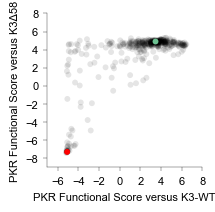

In [4]:
# Conditions: WT K3 versus K3Δ58
k3 = 'K3L-WT'

temp_df = df
pkr_resistant_vars = ['E375V','I378T','R382I','I405M','S448G','M455V','A473T','E480D','D486V','T491S','S504L','E524V']
def pkr_type(x, pkr_stop = 550):
    if x[-1] == "*" and int(x.split('-')[1][1:-1]) < pkr_stop:
        return "Nonsense"
    elif x.split('-')[1] in pkr_resistant_vars:
        return "Resistant Variant"
    else:
        return 'Variant'
temp_df['pkr_type'] = temp_df['pkr'].apply(pkr_type)
temp_df = temp_df.pivot_table(index=['pkr','pkr_type'], columns='k3', values='auc_mean').reset_index()

# format figure
width_in = 2
height_in = 2
font_size = 8
font_name = 'Arial'
stroke = .25
tick_len = 3
alpha_val = .1
marker_diameter = 3 # 1.75

font = {'family': font_name, 'size': font_size}
plt.rc('font', **font)
plt.rc('lines', linewidth=stroke)
plt.figure(figsize=(width_in, height_in)) # save size

# plot variants
ax = sns.scatterplot(
    data=temp_df,
    x='K3L-WT',
    y='K3L-Null',
    color='black',
    size=marker_diameter,
    legend=False,
    edgecolor='none',
    alpha=alpha_val
)

# plot wt 
ax = sns.scatterplot(
    data=temp_df.query('pkr == "PKR-WT"'),
    x='K3L-WT',
    y='K3L-Null',
    color='#6dc091',
    size=marker_diameter,
    legend=False,
    edgecolor='none',
    alpha=1
)

df1 = temp_df.query('pkr_type == "Nonsense"')
cols = ['K3L-Null', 'K3L-WT','K3L-H47R']
df1 = df1.groupby('pkr_type')[cols].mean().reset_index()

# plot nonsense mutations
ax = sns.scatterplot(
    data=df1,
    x='K3L-WT',
    y='K3L-Null',
    color='red',
    size=marker_diameter,
    legend=False,
    edgecolor='none',
    alpha=1
)


# Set x and y limits
ax.set_xlim(-7, 8)
ax.set_ylim(-9, 8)

# Dashed null cutoff line
hline = -3
#ax.axhline(hline, color='red', linestyle='--', linewidth=.75, alpha=1)

# Remove top and right spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_linewidth(stroke)
ax.spines['bottom'].set_linewidth(stroke)

# Set tick parameters
ax.tick_params(axis='both', which='both', direction='out', length=3, width=stroke)

# Set font properties for axis labels
ax.set_xlabel('PKR Functional Score versus K3-WT', fontsize=font_size, fontname=font_name)
ax.set_ylabel('PKR Functional Score versus K3Δ58', fontsize=font_size, fontname=font_name)

# Set tick marks and labels every 5 units
ax.xaxis.set_major_locator(ticker.MultipleLocator(2))
ax.yaxis.set_major_locator(ticker.MultipleLocator(2))

# save plot
plot_name = f'{k3}_K3Δ58.svg'
output_file = os.path.join(save_dir, plot_name)
plt.savefig(output_file, bbox_inches='tight', format='svg', transparent=True)

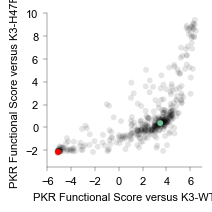

Pearson correlation coefficient: 0.682582201267725
Spearman correlation coefficient: 0.8321297745163283


In [6]:
# Condition: WT K3 versus K3-H47R
k3 = 'K3L-WT'

temp_df = df
pkr_resistant_vars = ['E375V','I378T','R382I','I405M','S448G','M455V','A473T','E480D','D486V','T491S','S504L','E524V']
def pkr_type(x, pkr_stop = 550):
    if x[-1] == "*" and int(x.split('-')[1][1:-1]) < pkr_stop:
        return "Nonsense"
    elif x.split('-')[1] in pkr_resistant_vars:
        return "Resistant Variant"
    else:
        return 'Variant'
temp_df['pkr_type'] = temp_df['pkr'].apply(pkr_type)
temp_df = temp_df.pivot_table(index=['pkr','pkr_type'], columns='k3', values='auc_mean').reset_index()

# format figure
width_in = 2
height_in = 2
font_size = 8
font_name = 'Arial'
stroke = .25
tick_len = 3
alpha_val = .1
marker_diameter = 3 # 1.75

font = {'family': font_name, 'size': font_size}
plt.rc('font', **font)
plt.rc('lines', linewidth=stroke)
plt.figure(figsize=(width_in, height_in)) # save size

# plot variants
ax = sns.scatterplot(
    data=temp_df,
    x='K3L-WT',
    y='K3L-H47R',
    color='black',
    size=marker_diameter,
    legend=False,
    edgecolor='none',
    alpha=alpha_val
)

# plot wt 
ax = sns.scatterplot(
    data=temp_df.query('pkr == "PKR-WT"'),
    x='K3L-WT',
    y='K3L-H47R',
    color='#6dc091',
    size=marker_diameter,
    legend=False,
    edgecolor='none',
    alpha=1
)

df1 = temp_df.query('pkr_type == "Nonsense"')
cols = ['K3L-Null', 'K3L-WT','K3L-H47R']
df1 = df1.groupby('pkr_type')[cols].mean().reset_index()

# plot nonsense mutations
ax = sns.scatterplot(
    data=df1,
    x='K3L-WT',
    y='K3L-H47R',
    color='red',
    size=marker_diameter,
    legend=False,
    edgecolor='none',
    alpha=1
)

# Set x and y limits
ax.set_xlim(-6, 7)
ax.set_ylim(-3.5, 10)

# Remove top and right spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_linewidth(stroke)
ax.spines['bottom'].set_linewidth(stroke)

# Set tick parameters
ax.tick_params(axis='both', which='both', direction='out', length=3, width=stroke)

# Set font properties for axis labels
ax.set_xlabel('PKR Functional Score versus K3-WT', fontsize=font_size, fontname=font_name)
ax.set_ylabel('PKR Functional Score versus K3-H47R', fontsize=font_size, fontname=font_name)

# Set tick marks and labels every 5 units
ax.xaxis.set_major_locator(ticker.MultipleLocator(2))
ax.yaxis.set_major_locator(ticker.MultipleLocator(2))

# save plot
plot_name = 'K3-WT_K3-H47R.svg'
output_file = os.path.join(save_dir, plot_name)
plt.savefig(output_file, bbox_inches='tight', format='svg', transparent=True)

plt.show()

# Calculate Pearson correlation
pearson_corr, _ = pearsonr(temp_df['K3L-WT'], temp_df['K3L-H47R'])
print("Pearson correlation coefficient:", pearson_corr)

# Calculate Spearman correlation
spearman_corr, _ = spearmanr(temp_df['K3L-WT'], temp_df['K3L-H47R'])
print("Spearman correlation coefficient:", spearman_corr)